In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
input_path = "../data/lexical_features.csv" # our input file
raw_data = pd.read_csv(input_path, header=0,skiprows=None,index_col=None,delimiter=",")
raw_data

,url,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,http://web.de/magazine/politik/saudi-arabien-f...,False,94,False,web,de,False,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,thestar.com/entertainment/article/520892,False,40,False,thestar,com,False,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,www.angelfire.com/ct2/jepson/blinkies/index.html,True,48,True,angelfire,com,False,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,http://allegro.pl/listing/listing.php?id=20585...,False,109,False,allegro,pl,False,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,usyouthsoccer.org/programs/SoccerAcrossAmerica...,False,50,True,usyouthsoccer,org,False,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,http://jmrsl.net/index.php?option=com_jevents&...,True,131,False,jmrsl,net,False,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,ostamyy.com/TV-radio-channels/Canada.htm,False,40,True,ostamyy,com,False,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,beatingaddiction.com/addictions/view.php/9971/...,False,56,False,beatingaddiction,com,False,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,heritagefoods.co.in/,False,20,False,heritagefoods,in,False,3,5.666667,6.350853,13,0,0.000000,0.000000,0


In [218]:
raw_data = raw_data.drop("url",axis=1)
raw_data

,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,False,94,False,web,de,False,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,False,40,False,thestar,com,False,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,True,48,True,angelfire,com,False,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,False,109,False,allegro,pl,False,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,False,50,True,usyouthsoccer,org,False,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,131,False,jmrsl,net,False,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,False,40,True,ostamyy,com,False,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,False,56,False,beatingaddiction,com,False,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,False,20,False,heritagefoods,in,False,3,5.666667,6.350853,13,0,0.000000,0.000000,0


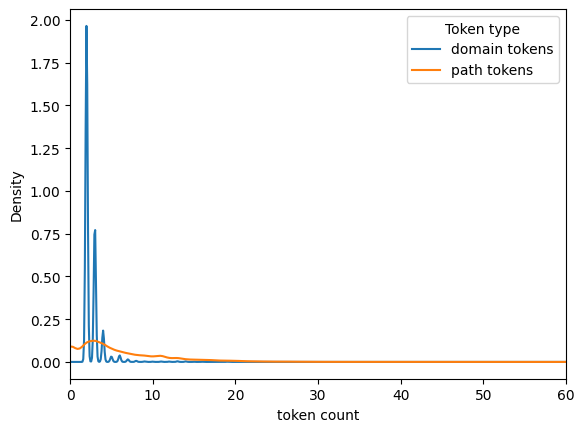

In [219]:
# plot some distrs
plt.xlabel("token count")
plt.xlim(xmin=0,xmax=60)
raw_data["domainTokenCount"].plot(kind='kde')
raw_data["pathTokenCount"].plot(kind='kde')
plt.legend(["domain tokens","path tokens"],title="Token type")

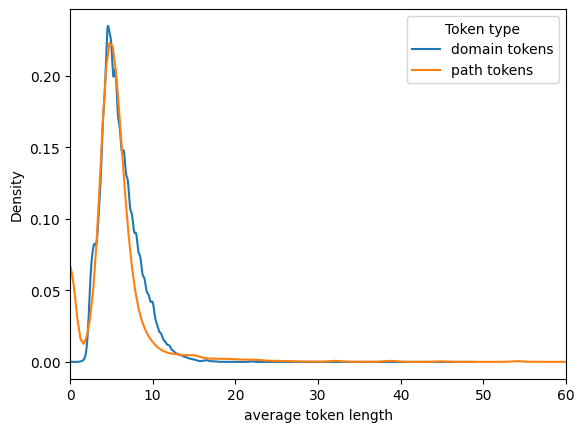

In [220]:
plt.xlabel("average token length")
plt.xlim(xmin=0,xmax=60)
raw_data["domainTokenLengthAvg"].plot(kind='kde')
raw_data["pathTokenLengthAvg"].plot(kind='kde')
plt.legend(["domain tokens","path tokens"],title="Token type")

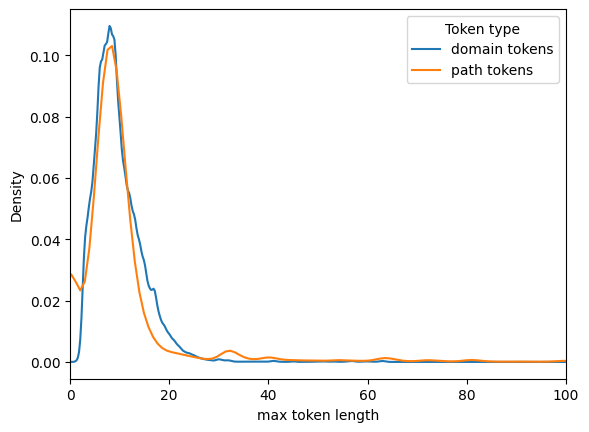

In [221]:
plt.xlabel("max token length")
plt.xlim(xmin=0,xmax=100)
raw_data["domainTokenLengthMax"].plot(kind='kde')
raw_data["pathTokenLengthMax"].plot(kind='kde')
plt.legend(["domain tokens","path tokens"],title="Token type")

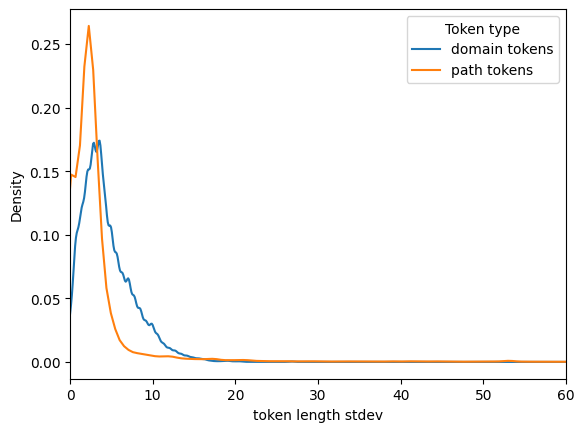

In [222]:
plt.xlabel("token length stdev")
plt.xlim(xmin=0,xmax=60)
raw_data["domainTokenLengthStdev"].plot(kind='kde')
raw_data["pathTokenLengthStdev"].plot(kind='kde')
plt.legend(["domain tokens","path tokens"],title="Token type")

In [223]:
feat1 = raw_data["hostname"].unique()
feat2 = raw_data["tld"].unique()
print("feature 1: length = %d\nfeatures = \n%s\n" %(len(feat1), feat1))
print("\nfeature 2: length = %d\nfeatures = \n%s\n" %(len(feat2), feat2))

feature 1: length = 36467
features = 
['web' 'thestar' 'angelfire' ... 'ostamyy' 'beatingaddiction'
 'heritagefoods']


feature 2: length = 1310
features = 
['de' 'com' 'pl' ... '58434' '59690' 'loan']



In [224]:
from collections import defaultdict
f1nonreduced = raw_data.apply(lambda x : x["hostname"], axis=1).map(lambda x : (x, 1))
f2nonreduced = raw_data.apply(lambda x : x["tld"], axis=1).map(lambda x : (x, 1))
f1 = defaultdict(int)
for key, value in f1nonreduced:
    f1[key] += value
f1 = pd.DataFrame(f1.items())
f1 = f1.sort_values(by=1, ascending=False)
print(f1)
f2 = defaultdict(int)
for key, value in f2nonreduced:
    f2[key] += value
f2 = pd.DataFrame(f2.items())
f2 = f2.sort_values(by=1, ascending=False)
print(f2)

                        0     1
8                      en  2063
516               youtube  1244
131              facebook  1152
140                amazon   737
13                   9779   716
...                   ...   ...
15691              costar     1
15690   shopuniontownmall     1
15689  reedcityhighschool     1
15688        analiticayma     1
36466       heritagefoods     1

[36467 rows x 2 columns]
            0      1
1         com  59432
3         org   7610
14        net   4326
0          de   2386
11         uk   1963
...       ...    ...
675     38823      1
678        cr      1
679     46387      1
680   hosting      1
1309     loan      1

[1310 rows x 2 columns]


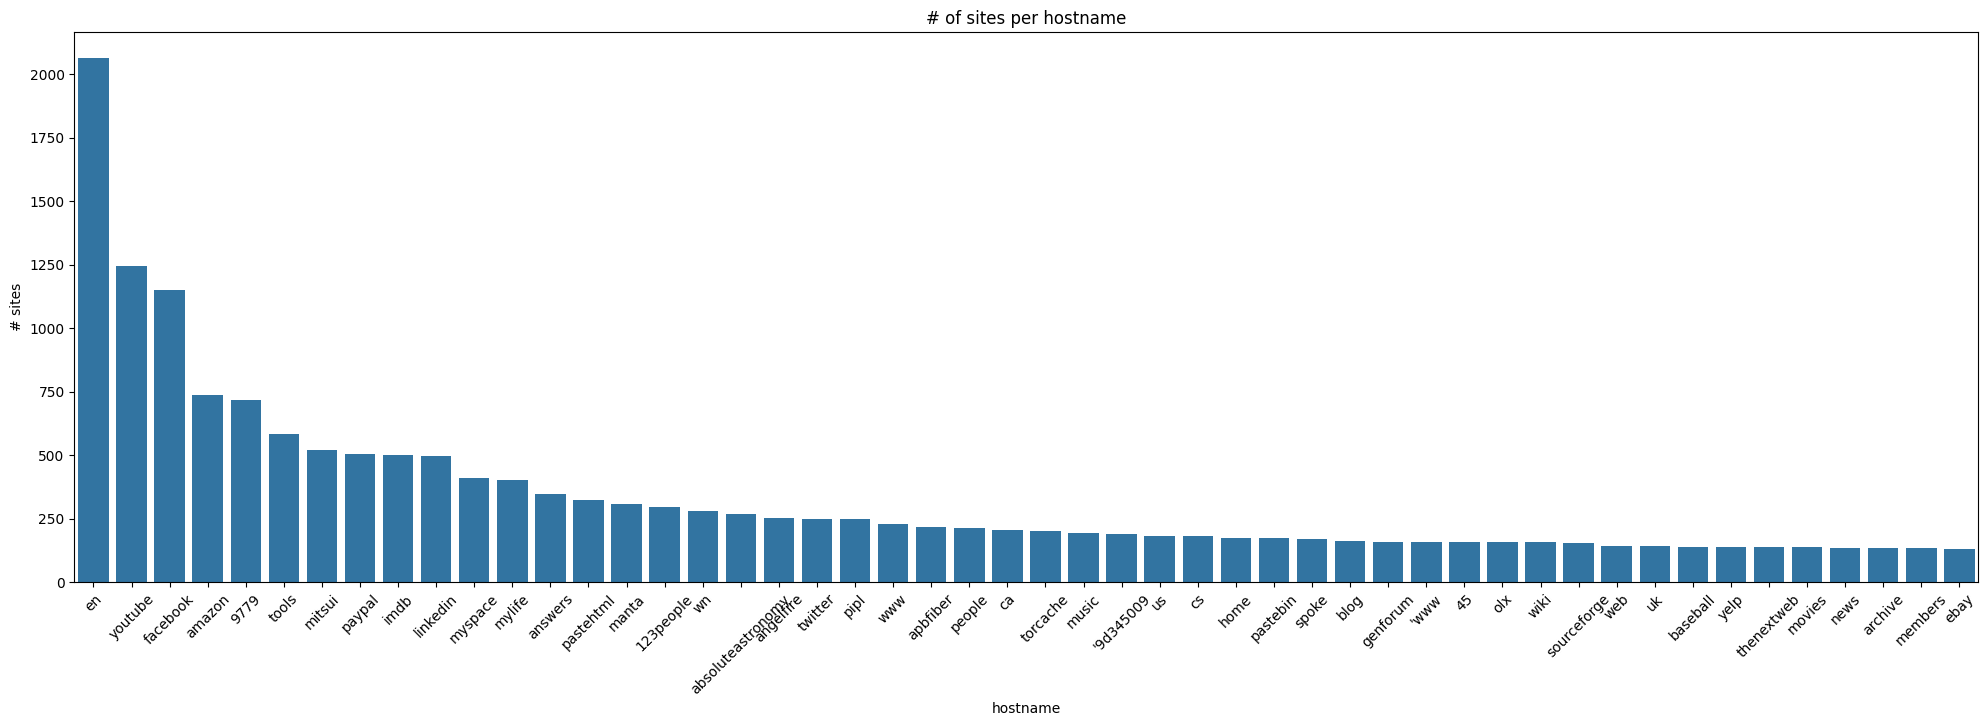

In [225]:
#plotting
a = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.barplot(x=np.arange(len(f1.head(50))), y=f1.head(50)[1])
plt.xticks(np.arange(len(f1.head(50))), f1.head(50)[0], rotation=45)
plt.title("# of sites per hostname")
plt.xlabel("hostname")
plt.ylabel("# sites")

plt.tight_layout()

plt.show()

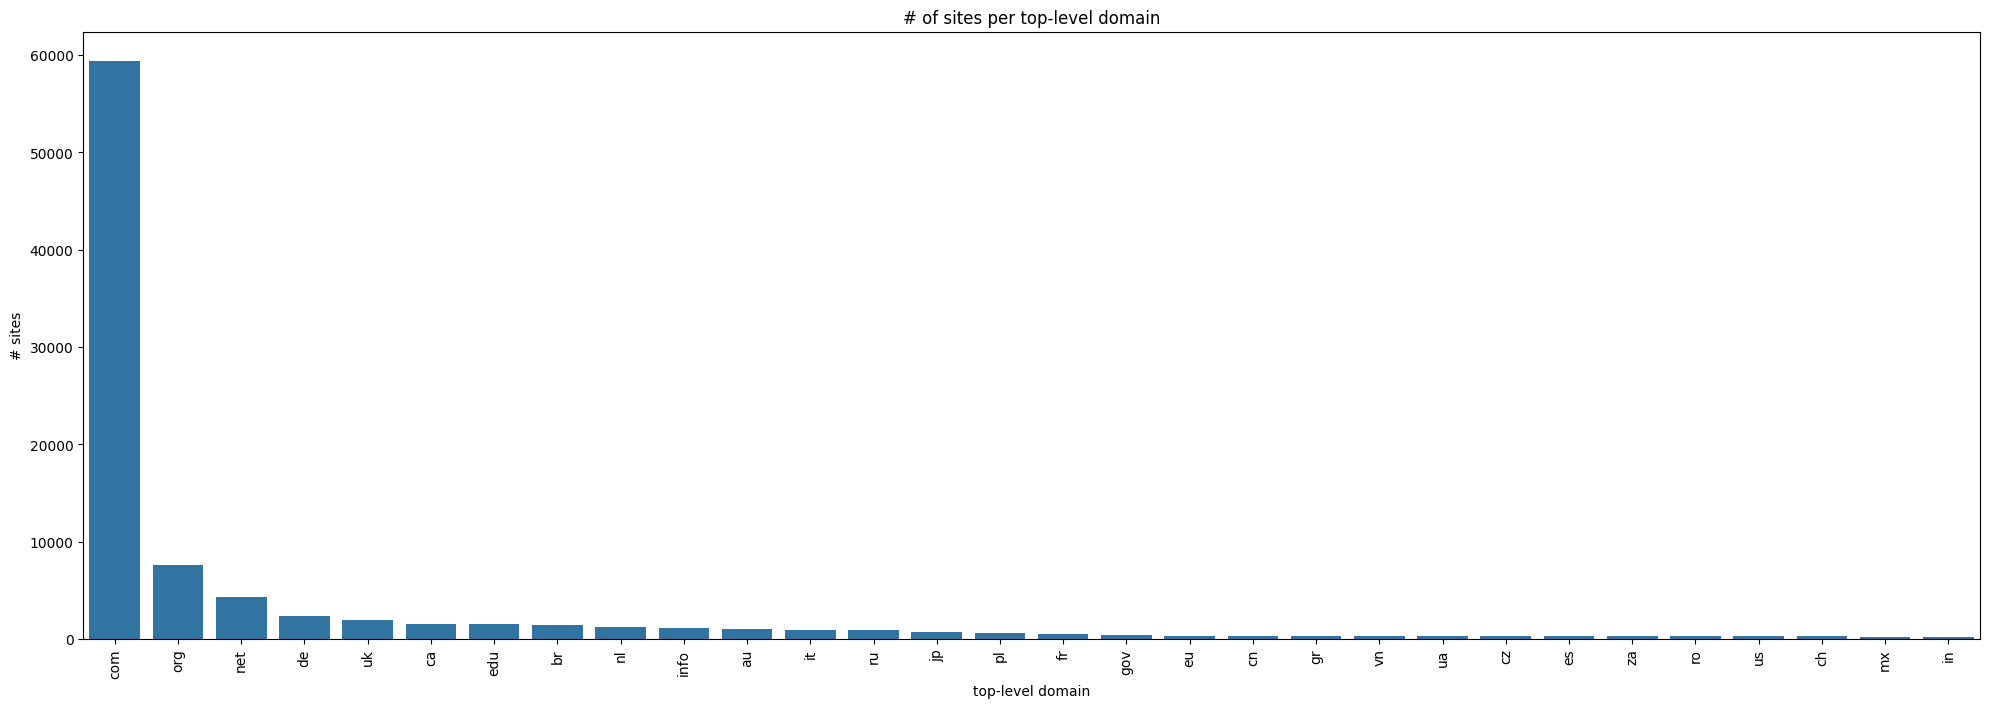

In [226]:
a = plt.figure(figsize=(20,20))
plt.subplot(3,1,2)
sns.barplot(x=np.arange(len(f2.head(30))), y=f2.head(30)[1])
plt.xticks(np.arange(len(f2.head(30))), f2.head(30)[0], rotation="vertical")
plt.title("# of sites per top-level domain")
plt.xlabel("top-level domain")
plt.ylabel("# sites")
plt.tight_layout()

plt.show()

In [227]:
f1.reset_index(drop=True,inplace=True)
f2.reset_index(drop=True,inplace=True)
f1.columns = ["hostname","frequency"]
f2.columns = ["tld","frequency"]
print(f1)
print(f2)

                 hostname  frequency
0                      en       2063
1                 youtube       1244
2                facebook       1152
3                  amazon        737
4                    9779        716
...                   ...        ...
36462              costar          1
36463   shopuniontownmall          1
36464  reedcityhighschool          1
36465        analiticayma          1
36466       heritagefoods          1

[36467 rows x 2 columns]
          tld  frequency
0         com      59432
1         org       7610
2         net       4326
3          de       2386
4          uk       1963
...       ...        ...
1305    38823          1
1306       cr          1
1307    46387          1
1308  hosting          1
1309     loan          1

[1310 rows x 2 columns]


In [228]:

f1encoded = pd.DataFrame(f1.apply(lambda x: x.name,axis=1))
f1encoded.columns = ["hostname"]
print(f1encoded)
f2encoded = pd.DataFrame(f2.apply(lambda x: x.name,axis=1))
f2encoded.columns = ["tld"]
print(f2encoded)

       hostname
0             0
1             1
2             2
3             3
4             4
...         ...
36462     36462
36463     36463
36464     36464
36465     36465
36466     36466

[36467 rows x 1 columns]
       tld
0        0
1        1
2        2
3        3
4        4
...    ...
1305  1305
1306  1306
1307  1307
1308  1308
1309  1309

[1310 rows x 1 columns]


In [229]:
f1dict = {}
f2dict = {}
def parseItemF1(item,i):
    enc = f1encoded.iloc[i].hostname
    print(item + " " + str(enc))
    f1dict[item] = enc
    return item
def parseItemF2(item,i):
    enc = f2encoded.iloc[i].tld
    print(item + " " + str(enc))
    f2dict[item] = enc
    return item

In [230]:
f1.apply(lambda x : parseItemF1(x.hostname,x.name),axis=1)

en 0
youtube 1
facebook 2
amazon 3
9779 4
tools 5
mitsui 6
paypal 7
imdb 8
linkedin 9
myspace 10
mylife 11
answers 12
pastehtml 13
manta 14
123people 15
wn 16
absoluteastronomy 17
angelfire 18
twitter 19
pipl 20
www 21
apbfiber 22
people 23
ca 24
torcache 25
music 26
'9d345009 27
us 28
cs 29
home 30
pastebin 31
spoke 32
blog 33
genforum 34
'www 35
45 36
olx 37
wiki 38
sourceforge 39
web 40
uk 41
baseball 42
yelp 43
thenextweb 44
movies 45
news 46
archive 47
members 48
ebay 49
espn 50
extratorrent 51
evri 52
distractify 53
articles 54
freebase 55
babal 56
37 57
flickr 58
spokeo 59
sports 60
secure 61
freepages 62
appleid 63
local 64
legacy 65
last 66
mic 67
yellowpages 68
rottentomatoes 69
192 70
whosdatedwho 71
blogs 72
classmates 73
e 74
docs 75
motthegioi 76
docstoc 77
veromi 78
zoominfo 79
tripadvisor 80
english 81
dictionary 82
groups 83
tv 84
tvguide 85
toulousa 86
42 87
kenh14 88
167 89
bleacherreport 90
scribd 91
tobogo 92
itunes 93
corporationwiki 94
censor 95
city 96
duckduckg

0                        en
1                   youtube
2                  facebook
3                    amazon
4                      9779
                ...        
36462                costar
36463     shopuniontownmall
36464    reedcityhighschool
36465          analiticayma
36466         heritagefoods
Length: 36467, dtype: object

In [231]:
f2.apply(lambda x : parseItemF2(x.tld,x.name),axis=1)

com 0
org 1
net 2
de 3
uk 4
ca 5
edu 6
br 7
nl 8
info 9
au 10
it 11
ru 12
jp 13
pl 14
fr 15
gov 16
eu 17
cn 18
gr 19
vn 20
ua 21
cz 22
es 23
za 24
ro 25
us 26
ch 27
mx 28
in 29
at 30
cl 31
dk 32
be 33
cc 34
se 35
ar 36
tk 37
hu 38
asia 39
biz 40
ir 41
co 42
id 43
lt 44
sk 45
tr 46
fm 47
nz 48
ie 49
pt 50
tv 51
xyz 52
my 53
me 54
si 55
kz 56
to 57
fi 58
no 59
ly 60
tech 61
ga 62
th 63
ee 64
tw 65
rs 66
ml 67
ph 68
top 69
pk 70
cf 71
club 72
kr 73
nu 74
pe 75
gq 76
mil 77
il 78
hk 79
is 80
io 81
ws 82
sg 83
name 84
online 85
253 86
by 87
mn 88
mobi 89
lu 90
link 91
19 92
26 93
242 94
127 95
bid 96
234 97
29 98
58 99
bd 100
142 101
ng 102
ke 103
ae 104
ms 105
129 106
207 107
review 108
130 109
np 110
az 111
cx 112
ve 113
178 114
website 115
105 116
10 117
186 118
6 119
qa 120
download 121
128 122
63 123
66 124
214 125
71 126
107 127
209 128
199 129
141 130
ba 131
ma 132
193 133
cy 134
164 135
buzz 136
79 137
cm 138
220 139
251 140
154 141
179 142
site 143
gle 144
22 145
174 146
126 147
am

0           com
1           org
2           net
3            de
4            uk
         ...   
1305      38823
1306         cr
1307      46387
1308    hosting
1309       loan
Length: 1310, dtype: object

In [232]:
raw_data["hostname"] = raw_data["hostname"].apply(lambda x : f1dict[x])
raw_data["tld"] = raw_data["tld"].apply(lambda x : f2dict[x])
raw_data

,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,False,94,False,40,3,False,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,False,40,False,1687,0,False,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,True,48,True,18,0,False,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,False,109,False,110,14,False,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,False,50,True,26560,1,False,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,131,False,521,2,False,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,False,40,True,16262,0,False,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,False,56,False,16261,0,False,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,False,20,False,36466,29,False,3,5.666667,6.350853,13,0,0.000000,0.000000,0


In [233]:
# fix TF
raw_data["isShortened"] = raw_data["isShortened"].apply(lambda x : 1 if x==True else 0)
raw_data["extension"] = raw_data["extension"].apply(lambda x : 1 if x==True else 0)
raw_data

,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,False,94,0,40,3,0,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,False,40,0,1687,0,0,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,True,48,1,18,0,0,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,False,109,0,110,14,0,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,False,50,1,26560,1,0,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,131,0,521,2,0,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,False,40,1,16262,0,0,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,False,56,0,16261,0,0,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,False,20,0,36466,29,0,3,5.666667,6.350853,13,0,0.000000,0.000000,0


In [234]:
print(raw_data["isShortened"].value_counts())
print(raw_data["extension"].value_counts())

isShortened
0    99940
1       61
Name: count, dtype: int64
extension
0    70606
1    29395
Name: count, dtype: int64


In [235]:
raw_data.to_csv(path_or_buf="../data/features_encoded.csv")